# 機械学習
<p>本章では，日本語と英語の翻訳コーパスである<a href="http://www.phontron.com/kftt/index-ja.html">京都フリー翻訳タスク (KFTT)</a>を用い，ニューラル機械翻訳モデルを構築する．ニューラル機械翻訳モデルの構築には，<a href="https://github.com/pytorch/fairseq">fairseq</a>，<a href="https://github.com/huggingface/transformers">Hugging Face Transformers</a>，<a href="https://github.com/OpenNMT/OpenNMT-py">OpenNMT-py</a>などの既存のツールを活用せよ．</p>

#### 計算に時間がかかるので、複数のnotebookに分割して平行に実行

## 90. データの準備
<p>機械翻訳のデータセットをダウンロードせよ．訓練データ，開発データ，評価データを整形し，必要に応じてトークン化などの前処理を行うこと．ただし，この段階ではトークンの単位として形態素（日本語）および単語（英語）を採用せよ．</p>

### implemented at 
[Chapter10_90.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_90.ipynb)

## 91. 機械翻訳モデルの訓練
<p>90で準備したデータを用いて，ニューラル機械翻訳のモデルを学習せよ（ニューラルネットワークのモデルはTransformerやLSTMなど適当に選んでよい）．</p>

### implemented at 
[Chapter10_91.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_91.ipynb)

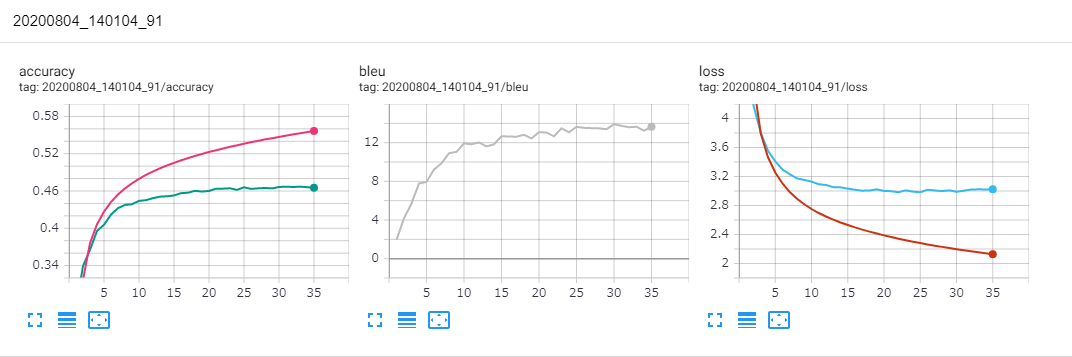

In [1]:
from IPython.display import Image
Image("imgs/20200804_140104_91.png")

[fastai_model.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/fastai_model.ipynb)<br>
https://github.com/fastai/course-nlp/blob/master/8-translation-transformer.ipynb

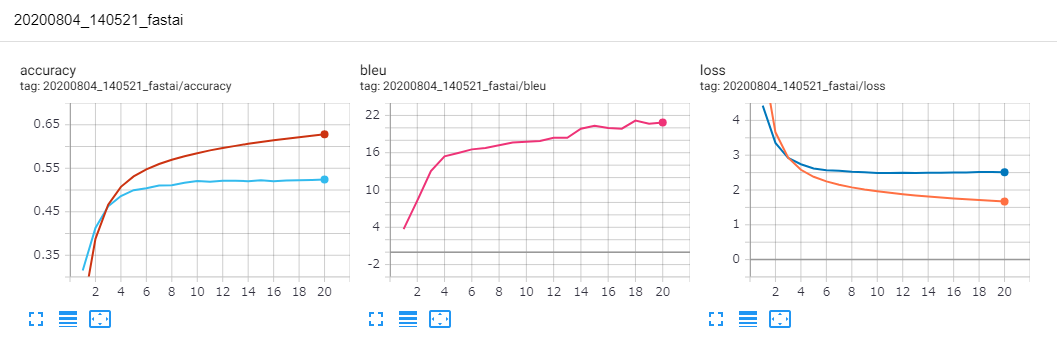

In [3]:
from IPython.display import Image
Image("imgs/20200804_140521_fastai.png")

[./fairseqTransformer.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/fairseqTransformer.ipynb)

#### ※fastai cource のモデルについてコレからあつかう。

## 92. 機械翻訳モデルの適用
<p>91で学習したニューラル機械翻訳モデルを用い，与えられた（任意の）日本語の文を英語に翻訳するプログラムを実装せよ．</p>

In [1]:
from fastai_model import Model, get_param, get_elms
from Chapter10_91 import Translator, DataSet, dataloader
import torch

In [2]:
import pickle
with open('model_logs/ja_dic.pickle', 'rb') as f: ja_dic = pickle.load(f)
with open('model_logs/en_dic.pickle', 'rb') as f: en_dic = pickle.load(f)
ja_dicsize = max(ja_dic.values())+1
en_dicsize = max(en_dic.values())+1

In [3]:
params = get_param(d_model=512)
model, optimizer, scheduler, device = get_elms(params, 'cpu', ja_dicsize, en_dicsize)
# model.load_state_dict(torch.load("model_logs/fastai_20200804_140519/18_save.t7", map_location=lambda storage, loc: storage))
model.load_state_dict(torch.load("model_logs/fastai_20200804_193148/21_save.t7", map_location=lambda storage, loc: storage))

cpu
44611280


<All keys matched successfully>

In [4]:
# Translator was implemented in 91 section
def translate_gen(model):
    def translate(sentence, *, maxlength, beam=1, device=torch.device('cpu')):
        return Translator(ja_dic, en_dic).translate_j2e(model, sentence, length=maxlength, device=device, beam=beam)
    return translate
translate = translate_gen(model)

In [5]:
for sent in ["しかしそれは人間です。", 
             "日本の水墨画を一変させた。", # He revolutionized the Japanese ink painting. :from train
             "梅小路を意味する「梅」に由来する。", # Stands for Umekoji : from test
             "2両編成2本連結は休日ダイヤで見られる。", # The JR Suburban Train Series 221 (comprising two cars joining two other cars) runs according to the holiday schedule.
             "（この時、法然は69歳。）"]: # (Honen was 69 then.) : from train
    print(sent)
    for beam in list(range(1,10,3))+[20]:
        print(f"{beam:2} {translate(sent, maxlength=25, beam=beam, device=device)[0]}")

しかしそれは人間です。
 1 However , this is human beings . [EOS]
 4 However , this is human beings . [EOS]
 7 However , this is human beings . [EOS]
20 However , this is human beings . [EOS]
日本の水墨画を一変させた。
 1 He completely changed Japanese ink paintings completely completely and ink paintings . [EOS]
 4 He changed Japanese ink - wash painting completely completely and ink - wash paintings . [EOS]
 7 He changed Japanese ink - wash painting completely completely and ink - wash paintings . [EOS]
20 He drastically changed Suiboku Suiboku - ga in Japan completely completely . [EOS]
梅小路を意味する「梅」に由来する。
 1 The name originates from ' ume , which means ' plum , ' and plum , ' which means Umekoji , ' came from the
 4 The name comes from ' ume , which means ' plum , and plum , came from ' [UNK] , meaning Umekoji . ' [EOS]
 7 The name is derived from ' ume , which means ' plum , and plum , ' which means Umekoji Umekoji , ' originated in
20 The name originates from ' ume , ' which means Umekoji , ' is derived fr

## 93. BLEUスコアの計測
<p>91で学習したニューラル機械翻訳モデルの品質を調べるため，評価データにおけるBLEUスコアを測定せよ．</p>

### implemented at 
[./Chapter10_93and94.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_93and94.ipynb)

## 94. ビーム探索
<p>91で学習したニューラル機械翻訳モデルで翻訳文をデコードする際に，ビーム探索を導入せよ．ビーム幅を1から100くらいまで適当に変化させながら，開発セット上のBLEUスコアの変化をプロットせよ．</p>

### implemented at 
[./Chapter10_93and94.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_93and94.ipynb)

## 95. サブワード化
<p>トークンの単位を単語や形態素からサブワードに変更し，91-94の実験を再度実施せよ．</p>

### implemented at 
[./Chapter10_95.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_95.ipynb)

## 96. 学習過程の可視化
<p><a href="https://www.tensorflow.org/tensorboard">Tensorboard</a>などのツールを用い，ニューラル機械翻訳モデルが学習されていく過程を可視化せよ．可視化する項目としては，学習データにおける損失関数の値とBLEUスコア，開発データにおける損失関数の値とBLEUスコアなどを採用せよ．</p>

pytorch tensorboard : https://pytorch.org/docs/stable/tensorboard.html

In [17]:
# same as the implementation in 91

### implemented at 
[./Chapter10_91.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_91.ipynb)

```tensorboard --logdir tb_logs/ --port 29933```

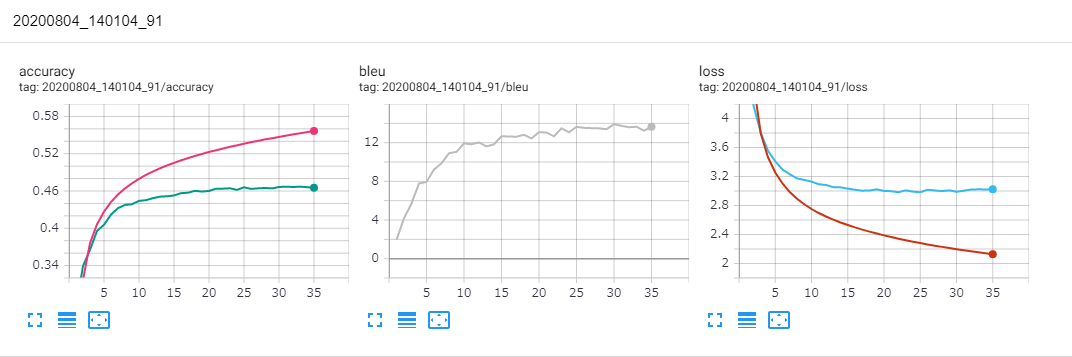

In [6]:
from IPython.display import Image
Image("imgs/20200804_140104_91.png")

## 97. ハイパー・パラメータの調整
<p>ニューラルネットワークのモデルや，そのハイパーパラメータを変更しつつ，開発データにおけるBLEUスコアが最大となるモデルとハイパーパラメータを求めよ．</p>

### implemented at 
[./Chapter10_97.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_97.ipynb)

## 98. ドメイン適応
<p><a href="https://nlp.stanford.edu/projects/jesc/index_ja.html">Japanese-English Subtitle Corpus (JESC)</a>や<a href="http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/">JParaCrawl</a>などの翻訳データを活用し，KFTTのテストデータの性能向上を試みよ．</p>

### implemented at 
[./Chapter10_98.ipynb](https://github.com/nlp-titech/nlp100-2020/blob/master/maruyama/Chapter10/Chapter10_98.ipynb)

## 99. 翻訳サーバの構築
<p>ユーザが翻訳したい文を入力すると，その翻訳結果がウェブブラウザ上で表示されるデモシステムを構築せよ．</p>

In [7]:
params = get_param()
model, optimizer, scheduler, device = get_elms(params, 'cpu', ja_dicsize, en_dicsize)

cpu
22328784


In [8]:
import http.server
import socketserver
from urllib.parse import urlparse
from urllib.parse import parse_qs

model.load_state_dict(torch.load("model_logs/98_kyoto-train_spacy_kyoto-train_20200806_103435/6_save.t7", map_location=lambda storage, loc: storage))
translate = translate_gen(model)
def server():
    PORT = 29934
    class Handler(http.server.BaseHTTPRequestHandler):
        def do_GET(self):
            parsed = urlparse(self.path)
            params = parse_qs(parsed.query)
            print(params)
            if "ja" not in params: return
            if "maxlength" not in params: return
            req_ja = params['ja'][0]
            print(f"request: {params['ja'][0]}, maxlength:{params['maxlength'][0]}")
            body = translate(params['ja'][0], maxlength=int(params['maxlength'][0]), beam=10, device=torch.device('cuda:0'))[0] # 92
            self.send_response(200)
            self.send_header('Content-type', 'text/html; charset=utf-8')
            self.send_header('Content-length', len(body.encode()))
            self.end_headers()
            self.wfile.write(body.encode())

    with socketserver.TCPServer(("", PORT), Handler) as httpd:
        print("serving at port", PORT)
        httpd.serve_forever()

import threading
server_thread = threading.Thread(target=server)
server_thread.start()

serving at port 29934


In [9]:
!curl http://localhost:29934 --get --data-urlencode "ja=私は神です。あなたも神です、みんな神です。" --data "maxlength=20"

{'ja': ['私は神です。あなたも神です、みんな神です。'], 'maxlength': ['20']}
request: 私は神です。あなたも神です、みんな神です。, maxlength:20
I am a god . You are all gods , and God . [EOS]

127.0.0.1 - - [06/Aug/2020 14:36:52] "GET /?ja=%E7%A7%81%E3%81%AF%E7%A5%9E%E3%81%A7%E3%81%99%E3%80%82%E3%81%82%E3%81%AA%E3%81%9F%E3%82%82%E7%A5%9E%E3%81%A7%E3%81%99%E3%80%81%E3%81%BF%E3%82%93%E3%81%AA%E7%A5%9E%E3%81%A7%E3%81%99%E3%80%82&maxlength=20 HTTP/1.1" 200 -


In [10]:
!curl http://localhost:29934 --get --data-urlencode "ja=助けてください、襲われています。" --data "maxlength=20"

{'ja': ['助けてください、襲われています。'], 'maxlength': ['20']}
request: 助けてください、襲われています。, maxlength:20
Please help me , and have been attacked . [EOS]

127.0.0.1 - - [06/Aug/2020 14:36:58] "GET /?ja=%E5%8A%A9%E3%81%91%E3%81%A6%E3%81%8F%E3%81%A0%E3%81%95%E3%81%84%E3%80%81%E8%A5%B2%E3%82%8F%E3%82%8C%E3%81%A6%E3%81%84%E3%81%BE%E3%81%99%E3%80%82&maxlength=20 HTTP/1.1" 200 -
